In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Preprocess the data
## Drop irrelavent columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Encode Categorical Variable
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
## One hot encode "Geography" columns
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [7]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
geo_encoder_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
## Combine One Hot Encoder columns with the original data
data = pd.concat([data.drop('Geography',axis=1),geo_encoder_df],axis=1)
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [10]:
### Save the encoders and scalar
with open('label_encoder_gender.pkl','wb') as file:
  pickle.dump(label_encoder_gender,file)

with open('one_hot_encoder_geo.pkl','wb') as file:
  pickle.dump(onehot_encoder_geo,file)



In [10]:
# Divide the dataset into dependent and independent features
X=data.drop('Exited',axis=1)
y = data['Exited']

## Split the data into training and testing
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

## Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

## Own practice

<Axes: >

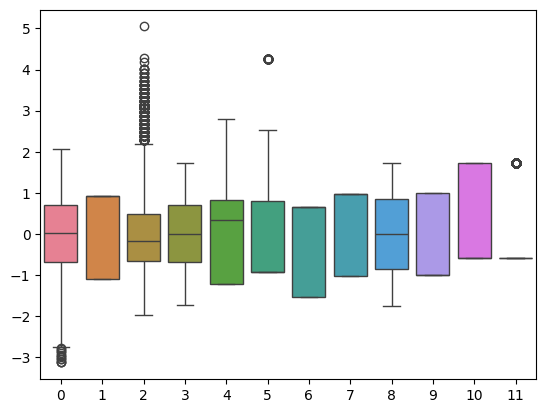

In [14]:
import seaborn as sns
sns.boxplot(X_train)

In [12]:
X_train.shape

(8000, 12)

In [13]:
X_test.shape

(2000, 12)

From Krish udemy contd

In [17]:
with open('scaler.pkl','wb') as file:
  pickle.dump(scaler,file)

## Ann Implementation

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [18]:
X_train.shape[1]

12

In [19]:
## Build our ANN model
model = Sequential([
  Dense(64, activation='relu',input_shape = (X_train.shape[1],)), ##HL1
  Dense(32, activation = 'relu'), ##HL2
  Dense(1, activation = 'sigmoid') ## Output layer
]
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=.01)

In [28]:
## Compile the model
model.compile(optimizer=opt, loss = "binary_crossentropy", metrics=['accuracy'])

In [24]:
## Set up Tensor board
log_dir = "logs/fit"+ datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [25]:
tensorflow_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)

In [30]:
## Set up Early Stoppings
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)


In [31]:
#Train the model
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100,
                    callbacks =[tensorflow_callback,early_stopping_callback] )

Epoch 1/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3495 - accuracy: 0.8609 - val_loss: 0.3542 - val_accuracy: 0.8615
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.8562 - val_loss: 0.3394 - val_accuracy: 0.8605
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3403 - accuracy: 0.8614 - val_loss: 0.3421 - val_accuracy: 0.8595
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.8620 - val_loss: 0.3447 - val_accuracy: 0.8605
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3329 - accuracy: 0.8626 - val_loss: 0.3733 - val_accuracy: 0.8530
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3331 - accuracy: 0.8645 - val_loss: 0.3537 - val_accuracy: 0.8605
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3330 - accuracy: 0.8622 - val_loss: 0.3460 - val_accuracy: 0.8605

In [32]:
model.save('model.h5')

d:\Krish_Udemy_practice\DL\ANN\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
#Load Tensorboard Extension
%load_ext tensorboard
